In [42]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# import
import numpy as np
import pandas as pd
import nltk 

In [44]:
# read
sms = pd.read_csv(r'C:\Users\hp\Downloads\spam.csv', encoding= 'latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns = {"v1":"label", "v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
print("No of rows", len(sms))

No of rows 5572


In [47]:
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [48]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [49]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

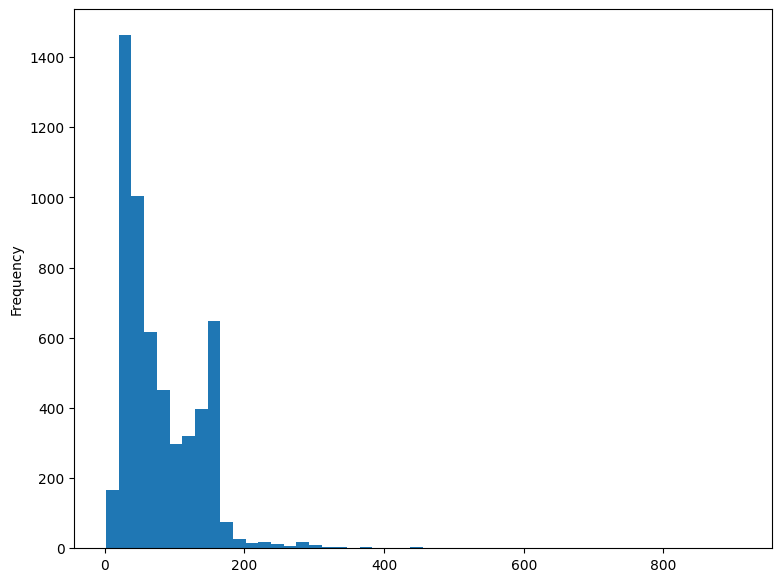

In [51]:
sms['length'].plot(bins=50, kind='hist', figsize=(9,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

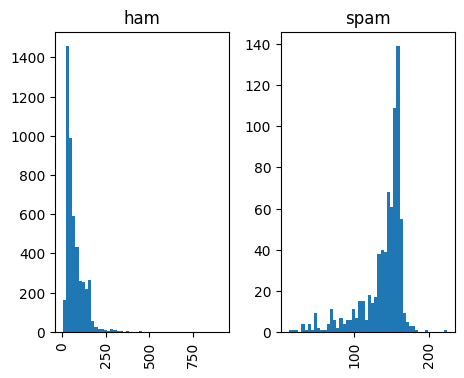

In [52]:
sms.hist(column='length', by='label', bins=50, figsize=(5,4))

In [53]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam' :1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
#implement bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [63]:
count = CountVectorizer()

text = count.fit_transform(sms['text'])

x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size=0.2, random_state=1)

In [56]:
# x_train = count.fit_transform(x_train)
# x_test = count.fit_transform(x_test)

In [64]:
print(x_train.shape)
print(x_test.shape)

(4457, 8672)
(1115, 8672)


In [58]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Fit and transform labels (e.g., 'spam' and 'ham') to numeric labels (e.g., 0 and 1)
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)


In [59]:
# y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# implement ML model

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [67]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform training labels to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform testing labels using the same encoder
y_test_encoded = label_encoder.transform(y_test)


In [68]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# model.fit(x_train, y_train)
# Initialize the MultinomialNB model
model = MultinomialNB()

# Fit the model with the training data and encoded training labels
model.fit(x_train, y_train_encoded)

# Make predictions using the testing data
# predictions = model.predict(x_test)


MultinomialNB()

In [69]:
prediction = model.predict(x_test)

In [70]:
print(prediction)

[0 0 0 ... 0 0 0]


In [73]:
# Convert 'y_test' to integers (0 and 1)
y_test = y_test.astype(int)

print(y_test)

1078    0
4028    0
958     0
4642    0
4674    1
       ..
324     0
1163    0
86      0
4214    0
90      0
Name: label, Length: 1115, dtype: int32


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score: {}".format(accuracy_score(y_test, prediction)) )
print("Precision score: {}".format(precision_score(y_test, prediction)) )
print("Recall score: {}".format(recall_score(y_test, prediction)) )
print("F1_score: {}".format(f1_score(y_test, prediction)) )

Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1_score: 0.9160839160839161


In [ ]:
# MLPClassifier
# 